## Bike Rental Demand Analysis
## Modelling Case Study  
By Clement Hugbo | <a href="https://github.com/codemathics">https://github.com/codemathics</a>

---

### Introduction:

This case study explores hourly bike rental patterns using a dataset that captures both temporal and weather-related variables. _**The goal is to uncover key drivers influencing rental demand**_, such as time of day, day of the week, temperature, and environmental conditions.

The objective of this report is to identify patterns in user behavior, evaluate how external factors impact rental volume, and provide actionable insights that support decision-making and strategy for bike-sharing operations.

The dataset which is gotten from the excel file _**bike_data**_ includes features such as:

- Hour
- Day of Week
- Month
- Season
- Temperature
- Humidity
- Wind Speed
- Visibility
- UV Index
- Rainfall
- Snowfall
- Holiday
- Rentals (target variable)

An initial exploration of the data is performed to discover trends and correlations between bike rentals and external features. This includes visualizations across time and weather respectively. A correlation analysis was also conducted to identify strong linear relationships with the target variable.

Following this, insights are extracted to help guide operational decisions, such as optimizing bike availability, anticipating peak periods, and developing weather-based strategies for improved customer experience and efficiency.

---

In [19]:
# importing necessary packages
import pandas as pd                    # data science essentials
import matplotlib.pyplot as plt        # data visualization essentials
import seaborn as sns                  # data visualization advanced version

# suppressing warnings for cleaner output
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# setting a visual theme for consistency
sns.set_theme(style = 'whitegrid')

---

## Session 01: Dataset Overview

This dataset tracks hourly bike rentals and weather conditions. 
By analyzing trends across time and weather variables, I aim to understand user behavior and provide actionable insights.

**Columns include:**
- `Temperature`, `Humidity`, `Rainfall`: Weather variables
- `RENTALS`: Target variable (what we're predicting)

In [20]:
# specifying a file name
file = "bikes_data.xlsx"

# converting data types with a dictionary
data_types = {
    "Month"       : str,
    "Day of Week" : str,
    "Season"      : str,
    "Holiday"     : str
}

# reading the file into Python through pandas
bike_data = pd.read_excel(io         = file,
                          sheet_name = 0,
                          header     = 0,
                          dtype      = data_types)

# outputting the first 5 rows of the dataset
bike_data.head(n = 5)

,ID,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,Season,Holiday,RENTALS
0,1,Jan,Sunday,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,0.0,Winter,Yes,221
1,2,Jan,Sunday,13,2.4,22,2.3,1921,-17.2,1.10,0.0,0.0,Winter,Yes,268
2,3,Jan,Sunday,16,3.0,28,2.5,1864,-13.7,0.51,0.0,0.0,Winter,Yes,335
3,4,Jan,Sunday,17,1.8,33,3.3,1913,-12.8,0.18,0.0,0.0,Winter,Yes,299
4,5,Jan,Sunday,20,-0.3,40,1.2,1936,-12.2,0.00,0.0,0.0,Winter,Yes,225


In [8]:
# linear correlation between numeric columns using Pearson
bike_data.iloc[ : , 1: ].corr(method = 'pearson',
                              numeric_only = True).round(decimals = 2)

,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,RENTALS
Hour,1.00,0.11,-0.25,0.27,0.15,-0.01,0.14,0.02,-0.06,0.42
Temperature,0.11,1.00,0.17,-0.04,0.06,0.91,0.34,0.05,-0.25,0.55
Humidity,-0.25,0.17,1.00,-0.33,-0.54,0.55,-0.47,0.19,0.11,-0.22
Wind Speed,0.27,-0.04,-0.33,1.00,0.17,-0.17,0.31,-0.02,-0.01,0.12
Visibility,0.15,0.06,-0.54,0.17,1.00,-0.16,0.17,-0.12,-0.08,0.24
Dew Point Temperature,-0.01,0.91,0.55,-0.17,-0.16,1.00,0.08,0.11,-0.17,0.38
UV Index,0.14,0.34,-0.47,0.31,0.17,0.08,1.00,-0.06,-0.08,0.25
Rainfall,0.02,0.05,0.19,-0.02,-0.12,0.11,-0.06,1.00,0.00,-0.11
Snowfall,-0.06,-0.25,0.11,-0.01,-0.08,-0.17,-0.08,0.00,1.00,-0.16
RENTALS,0.42,0.55,-0.22,0.12,0.24,0.38,0.25,-0.11,-0.16,1.00


---

## Session 02: Exploratory Data Analysis (EDA)

In this section, I explore key behavioral and environmental patterns that influence bike rental activity with a focus to uncover insights that explain **why people rent bikes**, **how external factors affect demand**, and what **patterns exist in their behavior** throughout the week and day.

I will be analyzing the following areas:

1. **Average Rentals by Day of the Week**  
   To investigate weekday vs weekend rental patterns and identify behavior related to commuting or recreational use. My goal essentially is to showcase why these rentals are done more in some days and why they aren't in other days of the week.<br><br>

2. **Rentals vs Temperature**  
   To determine whether warmer temperatures encourage higher rental activity, and identify ideal temperature ranges for operational planning. This is crucial as certain weather conditions can also relatively affect how bikes are being rented over time.<br><br>
   
3. **Heatmap**  
   I will use this to uncover heatmap between temperature and rentals and how the information from the visualization helps showcase where rentals is correlating more to.<br><br>

3. **Average Rentals by Hour of Day**  
   To uncover peak time windows for bike usage and evaluate whether usage aligns with work/school commute hours. While this might be slightly similar to the analysis i would give for the days of the week, my goal is to deep even further down to correlate data from the root and see how much influx of rental demands comes in an hourly basis that makes up a day.

Each of these insights is accompanied by clear visualizations and narrative interpretations. Together, they will form the basis of my answers to the business questions posed later on in this report.

In [21]:
# calculating average rentals by weekday
weekday_rentals = bike_data.groupby(by = 'Day of Week').agg({'RENTALS': 'mean'})

# reordering days manually for consistent plotting
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_rentals = weekday_rentals.reindex(weekday_order)

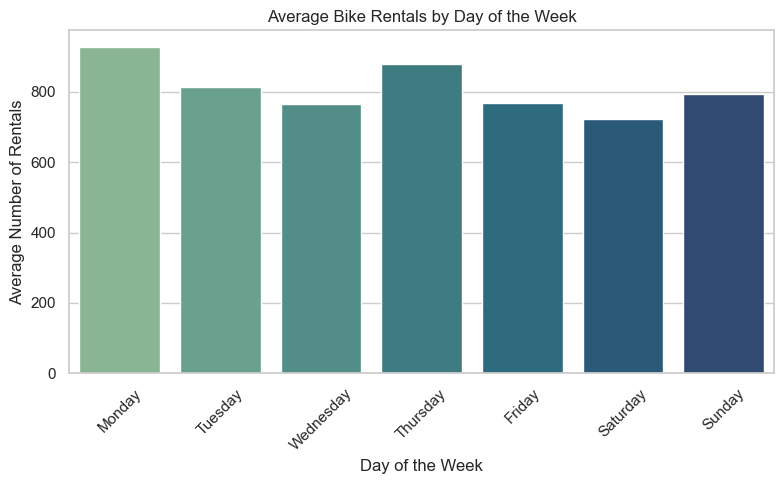

In [22]:
# Visualization: Rentals by Day of Week ##

# setting figure size
plt.figure(figsize = (8, 5))

# barplot of average rentals, weekday_rentals defined above
sns.barplot(x     = weekday_rentals.index,
            y     = weekday_rentals.RENTALS,
            palette = "crest")

# customizing labels and title
plt.title(label   = "Average Bike Rentals by Day of the Week")
plt.xlabel(xlabel = "Day of the Week")
plt.ylabel(ylabel = "Average Number of Rentals")
plt.xticks(rotation = 45)

# displaying the plot
plt.tight_layout()
plt.show()

---

## Session 02.1 – Insight: Rentals by Day of the Week

This bar chart presents the average number of bike rentals for each day of the week.

From the visualization, we observe that weekdays (particularly Monday and Thursday) have the highest average rentals, while weekends show a slight decline. This pattern suggests that many users rely on bikes as a mode of transportation during the work week, possibly for commuting to work, school, or errands.

Lower weekend rentals may indicate a shift from routine commuting to more recreational or leisure-based use, which tends to be less consistent. This behavioral insight supports the hypothesis that bike usage is largely tied to structured, weekday activities.

I will also like to add that from the insight gotten from this data, Sunday seem to be gearing up quite a bit, even slightly higher than Wednesday and Friday, making Saturday unavoidably the lowest of them all. What this tells us about Sunday from my analysis is that people may tend to be renting bikes earlier for the week that is just about to begin, this could be via online renting platforms like a web or mobile app, or just going to the stores if they are open to rent the bikes in preparation for the work week that is about to start the next day.

Understanding this trend allows the company to prioritize maintenance, promotions, and bike availability during peak weekday hours to enhance service efficiency and customer satisfaction and from this analysis, those peak weekdays happen to be on Mondays and Thursdays resepctively.

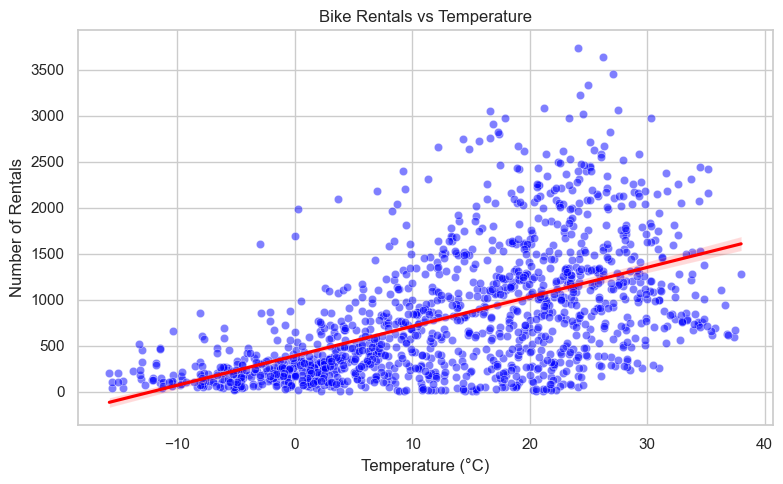

In [30]:
# setting figure size
plt.figure(figsize = (8, 5))

# scatterplot with regression line
sns.scatterplot(data   = bike_data,
                x      = 'Temperature',
                y      = 'RENTALS',
                alpha  = 0.5,
                color  = 'blue')

sns.regplot(data        = bike_data,
            x           = 'Temperature',
            y           = 'RENTALS',
            scatter     = False,
            color       = 'red')

# labeling the chart
plt.title(label   = 'Bike Rentals vs Temperature')
plt.xlabel(xlabel = 'Temperature (°C)')
plt.ylabel(ylabel = 'Number of Rentals')

# displaying the chart
plt.tight_layout()
plt.show()

In [24]:
# calculating Pearson correlations for numeric columns only
correlation_matrix = bike_data.iloc[ : , 1: ].corr(method = 'pearson', numeric_only = True).round(2)

# displaying the matrix
correlation_matrix

,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,RENTALS
Hour,1.00,0.11,-0.25,0.27,0.15,-0.01,0.14,0.02,-0.06,0.42
Temperature,0.11,1.00,0.17,-0.04,0.06,0.91,0.34,0.05,-0.25,0.55
Humidity,-0.25,0.17,1.00,-0.33,-0.54,0.55,-0.47,0.19,0.11,-0.22
Wind Speed,0.27,-0.04,-0.33,1.00,0.17,-0.17,0.31,-0.02,-0.01,0.12
Visibility,0.15,0.06,-0.54,0.17,1.00,-0.16,0.17,-0.12,-0.08,0.24
Dew Point Temperature,-0.01,0.91,0.55,-0.17,-0.16,1.00,0.08,0.11,-0.17,0.38
UV Index,0.14,0.34,-0.47,0.31,0.17,0.08,1.00,-0.06,-0.08,0.25
Rainfall,0.02,0.05,0.19,-0.02,-0.12,0.11,-0.06,1.00,0.00,-0.11
Snowfall,-0.06,-0.25,0.11,-0.01,-0.08,-0.17,-0.08,0.00,1.00,-0.16
RENTALS,0.42,0.55,-0.22,0.12,0.24,0.38,0.25,-0.11,-0.16,1.00


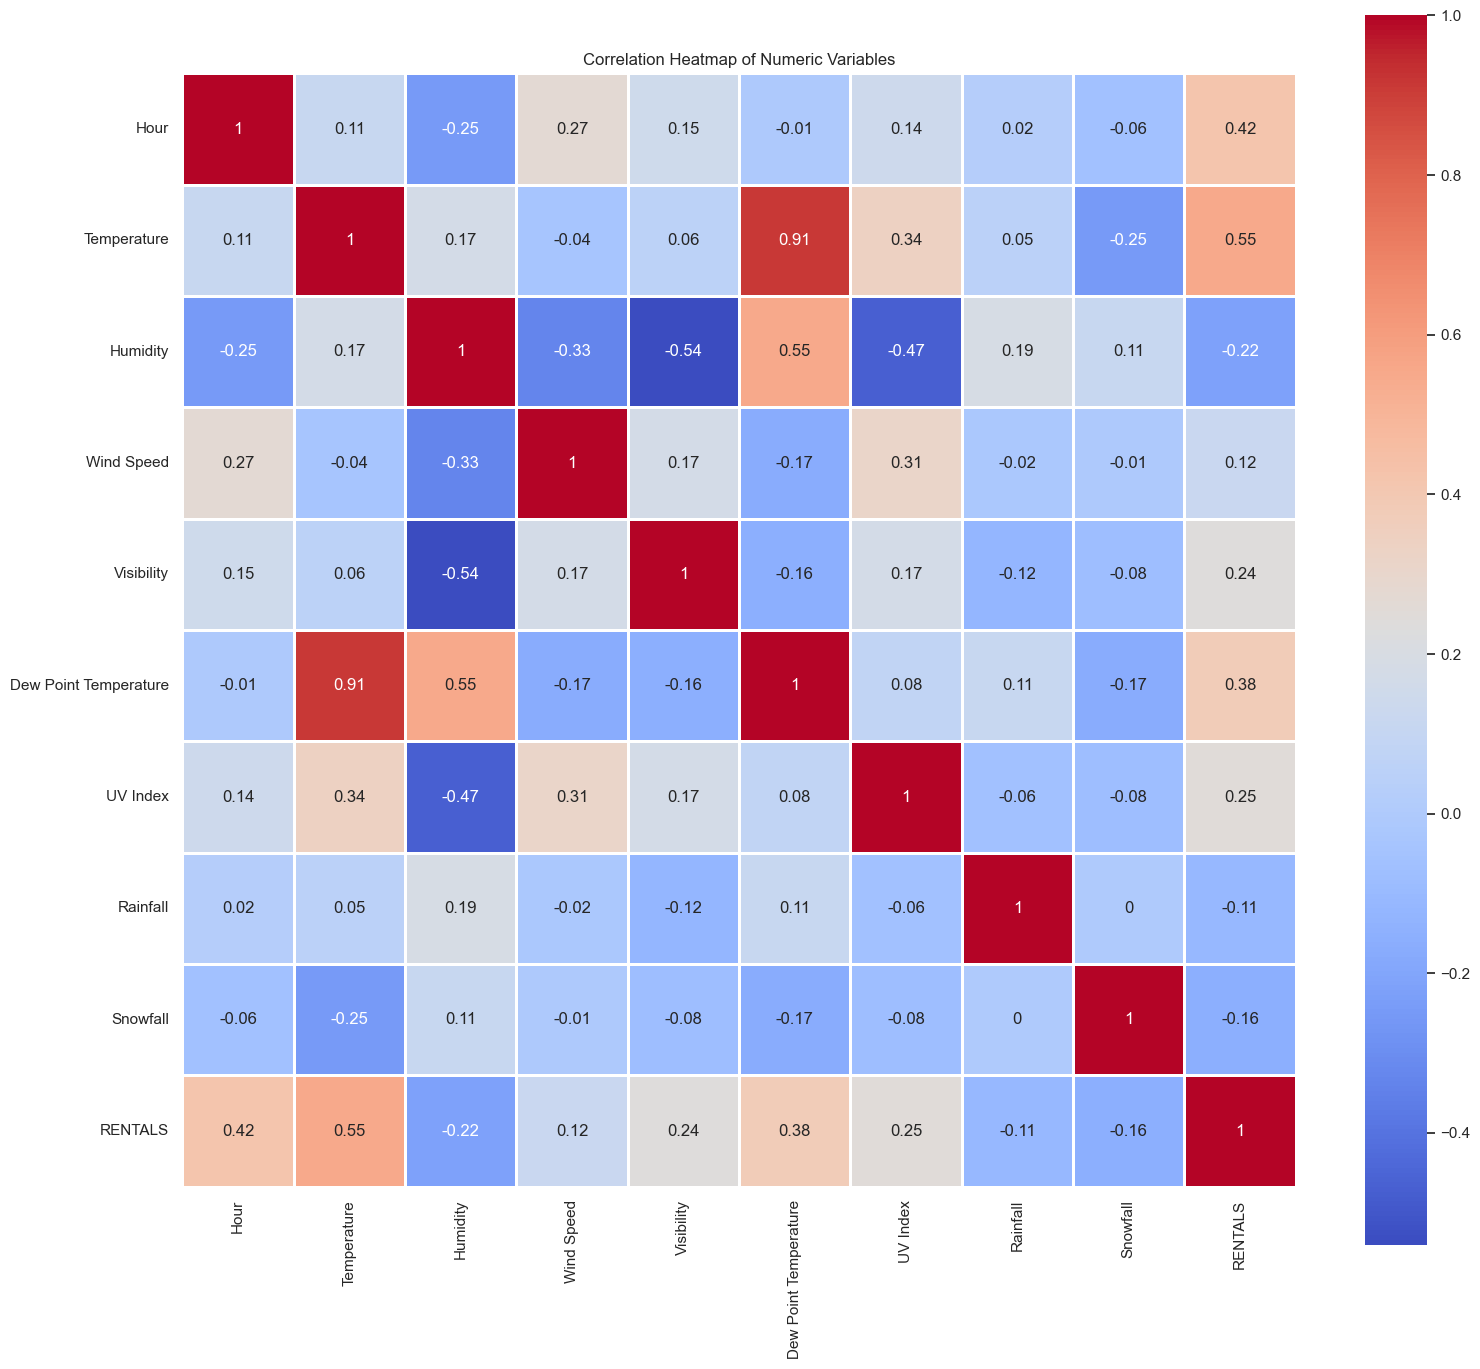

In [25]:
# setting figure size
plt.figure(figsize = (16, 14))

# plotting the heatmap
sns.heatmap(data       = correlation_matrix,
            annot      = True,
            cmap       = 'coolwarm',
            linewidths = 0.8,
            linecolor  = 'white',
            square     = True)

# chart title
plt.title(label = 'Correlation Heatmap of Numeric Variables')

# show plot
plt.tight_layout()
plt.show()

## Session 02.2 – Insight: Rentals vs Temperature

This scatterplot shows the relationship between temperature and the number of bike rentals. Each point represents a specific hourly entry in the dataset.

We see a clear upward trend: as temperatures rise, the number of rentals tends to increase. The red regression line confirms this positive linear correlation. Most notably, rentals appear to peak in the range of 15°C to 30°C, which is likely a comfort zone for riders.

On the flip side, very cold temperatures (particularly those dropping below freezing, 0°C) result in significantly fewer rentals, showing that cyclists tend to avoid biking in harsh winter conditions. This demonstrates that climate conditions play a major role in customer behavior.

The business can leverage this information to predict busy periods, optimize their fleet distribution, and create weather-targeted marketing strategies.

This finding also aligns with my prior research, which suggests that bike usage increases with moderate and warm temperatures, while cold or extreme heat deters usage.

I also went further to provide a heatmap visualization and the heatmap effectively shows that temperature-related variables are the primary weather drivers of bike rental demand, while precipitation and humidity act as deterrents.

In [26]:
# calculating the average number of rentals per hour
hourly_rentals = bike_data.groupby(by = 'Hour').agg({'RENTALS': 'mean'})

# resetting index so hour becomes a column again
hourly_rentals = hourly_rentals.reset_index()

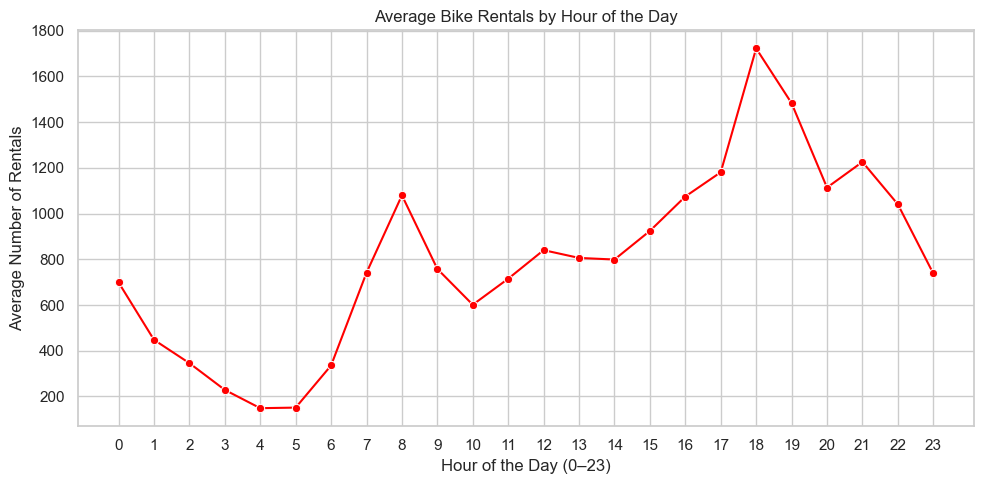

In [27]:
# setting figure size
plt.figure(figsize = (10, 5))

# lineplot of average rentals per hour, hourly_rentals defined above
sns.lineplot(data  = hourly_rentals,
             x     = 'Hour',
             y     = 'RENTALS',
             marker = 'o',
             color  = 'red')

# chart labels and title
plt.title(label   = 'Average Bike Rentals by Hour of the Day')
plt.xlabel(xlabel = 'Hour of the Day (0–23)')
plt.ylabel(ylabel = 'Average Number of Rentals')
plt.xticks(ticks = range(0, 24))

# displaying the plot
plt.tight_layout()
plt.show()

---

## Session 02.3 – Insight: Rentals by Hour of the Day

This line chart highlights user behavior across different hours of the day. Clear rental peaks appear at around 8 AM and again around 5–6 PM — closely aligning with traditional commute hours. This strongly suggests that bike usage is driven primarily by work and school schedules.

The demand steadily decreases during midday hours and drops sharply after 8 PM. This pattern further reinforces the idea that most bike rentals are much more of utilities (transport-based) than recreational.

This time-based insight is crucial for operational planning. Services can improve by allocating more bikes and maintenance crews during peak morning and evening hours to meet demand efficiently.

This insight also gives us good enough reason to understand why certain days of the week have more influx of rentals compared to other days. For instance, Mondays are usually the first days of a working week, so it makes sense to have a lot of people in the early hours of these days renting bikes for commute to meet with work or other daily activities.

---

## Session 03: My Professional Report to Business Questions

#### Analysis Question 1: Why Are the Majority of Users Renting Bicycles?

The majority of users appear to rent bicycles for practical and structured purposes — primarily for daily commuting. This conclusion is drawn from two clear patterns i provided in the analysis above in (sessions 02.1 and 02.3 respectively). First, rentals peak around 8 AM and 5–6 PM, which directly aligns with typical work and school commuting hours. Second, weekday rentals are significantly higher than weekend rentals, particularly on Mondays and Thursdays.

These patterns suggest that bicycles are being used as a reliable mode of urban transport rather than solely for leisure. The consistency across workdays reinforces the idea of habitual use, for instance, riders likely depend on bikes for predictable, repeat trips during high-traffic times of the day.

This insight is critical for operational decisions: by understanding that weekday morning and evening hours carry the heaviest demand, the company can better allocate bikes, staff, and maintenance efforts during these peak windows to maximize profitability, engagement and consistent business activities.

---

#### Analysis Question 2: Are There Ideal Weather Conditions That Create High Bike Rental Demand?

Certainly! and my analysis strongly supports the idea that weather, especially temperature, plays a major role in rental behavior. Warmer temperatures (between 15°C and 30°C) are consistently associated with higher rental counts, as shown in both the scatterplot and correlation heatmap. Temperature had the highest positive correlation with rentals, suggesting it's a reliable predictor of demand.

Other weather variables, such as rainfall, snowfall, and humidity, showed weak or negative correlations with bike usage. This implies that poor weather conditions can reduce demand, even if temperature is otherwise favorable. While not every weather factor has a strong individual effect, their combined influence is important for predicting user behavior.

Therefore, ideal conditions for high rental demand are warm, dry, and clear weather. The company can use this information to prepare resources in advance of seasonal surges or temporarily unfavorable conditions, ensure to study seasons and times to figure out best conditions to even purchase special types of bikes that users will love without having to invest too much into it without result.

---

## Analysis Question 3: How Should the Company Strategize Based on Your Results?

Based on the patterns observed in the data, it's clear that bike rental demand is influenced by time of day, day of the week, and temperature. These findings provide a strong foundation for the company to adjust operations and improve overall efficiency. Below are some practical strategies i have come up with for the company to consider:

- **Prioritize weekday peak hours:** Rentals spike around 8 AM and 5–6 PM on weekdays, most likely due to commuting. The company should ensure bike availability and station readiness during these times.

- **Scale operations with temperature trends:** Warmer temperatures between 15°C and 30°C drive more rentals. The company can plan ahead by preparing inventory and launching promotions during warm-weather months. Even come up with creative marketing tactics or advertisement during these period to showcase stores so people are aware in time and can't resist given the weather conditions that period is great for them anyways.

- **Shift focus during off-peak periods:** Weekends and colder days show lower demand. These times can be used for maintenance, system checks, or offering casual riding promotions to balance usage.

These strategies will help the company respond to real patterns in user behavior, improve service delivery, and make smarter resource decisions throughout the year.

---

## Conclusion:

This analysis explored key behavioral and environmental patterns that affect bike rental demand. The results clearly show that rentals are highest during weekday commute hours, confirming that most users rely on bikes for structured, everyday transportation. Temperature also plays a major role, warmer weather leads to increased rentals, while poor conditions like rain and snow tend to reduce usage.

By combining time-based and weather-based insights, we can confidently say that demand is both predictable and seasonal. These trends give the company clear opportunities to improve: optimize operations during peak hours, prepare for seasonal surges, and use off-peak periods for system maintenance or targeted promotions.

Overall, the data shows that user behavior follows consistent patterns and with these right strategy fully backed by data and research, the company can meet demand more efficiently, improve service quality, and drive long-term growth.

---

## References:

Zhang, Y., & Mi, Z. (2018). Environmental benefits of bike sharing: A big data-based analysis. *Applied Energy*, 220, 296-301. https://www.sciencedirect.com/science/article/abs/pii/S0306261918304392?via%3Dihub

Zhang, J., Meng M., Koh, P. P., Wong, D. Y., (2021). Life duration of bike sharing systems. https://www.sciencedirect.com/science/article/abs/pii/S2213624X21000407?via%3Dihub